# SyriaTel Customer Churn Modeling Project
**Author:** Brian Amani

## Project Overview
***

This project focuses on developing a model to predict whether a customer is likely to churn from SyriaTel, a telecommunications company. The goal is to help SyriaTel reduce churn by identifying high-risk customers and applying targeted retention strategies. By analyzing customer data, the model provides actionable insights to stakeholders aiming to minimize churn and prevent revenue loss. The results enable SyriaTel to identify at-risk customers and take proactive steps to retain them, supporting efforts to improve customer loyalty and profitability. Specifically, the analysis indicates that SyriaTel should:


## Business Understanding
***

Customer churn poses a significant challenge, as it leads to revenue loss and increased expenses for acquiring new customers. In an industry where retaining customers is key to financial success, minimizing churn becomes a top priority. The aim is to detect early signs of customer departure by analyzing behavior patterns, which helps predict churn and allows SyriaTel to engage at-risk customers with specific retention tactics.

## Data Understanding
***

The provided dataset contains detailed information about SyriaTel customers, including features related to customer behavior, demographics, and service usage. It also features a mix of numerical and categorical variables
- There are 3,333 entries and 21 columns, the dataset includes variables such as account length, international plan, total day minutes, and customer service calls. 
- The target variable is binary. This can be explained as: If a customer has churned (True) & if a customer has not churned (False). 


## Data Analysis & Preparation
***

Importing important libraries and performing EDA

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
df = pd.read_csv("churn_data.csv")

# Display the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Further analysis of our data frame info

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

(3333, 21)

### Variable Descriptions
Based on domain knowledge.

* **state:** Categorical variable indicating the customer's state.
* **account length:** Numeric variable indicating the length of the customer account.
* **area code:** Numeric variable indicating the area code of the customer.
* **phone number:** Categorical variable representing the customers number.
* **international plan:** Categorical variable indicating if the customer has an international plan.
* **voice mail plan:** Categorical variable indicating if the customer has a voicemail plan.
* **number vmail messages:** Numeric variable indicating the number of voicemail messages.
* **total day/eve/night/intl minutes:** Numeric variables indicating usage minutes in various time segments.
* **total day/eve/night/intl calls:** Numeric variables indicating the number of calls in various time segments.
* **total day/eve/night/intl charge:** Numeric variables indicating charges in various time segments.
* **customer service calls:** Numeric variable indicating the number of customer service calls made by the customer.
* **churn:** Binary target variable indicating customer churn (True/False).

Conducting churn analysis

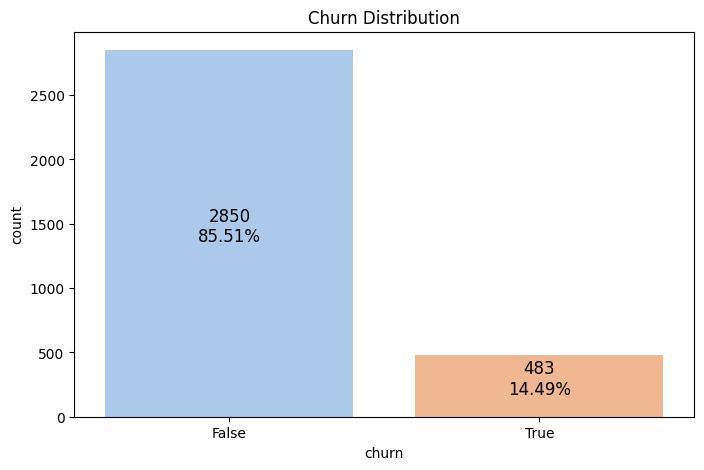

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot for the churn variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='churn', data=df, palette='pastel')

# Add counts and percentages inside the bars
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    height = p.get_height()
    count = int(p.get_height())
    ax.annotate(f'{count}\n{percentage}', (p.get_x() + p.get_width() / 2., p.get_height() / 2.) ,
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
    
# Display the plot
plt.title('Churn Distribution')
plt.show()
